In [1]:
!pip install deap

In [1]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import elitism

In [2]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

DIMENSIONS = 2 
BOUND_LOW, BOUND_UP = -512.0, 512.0
POPULATION_SIZE = 300
P_CROSSOVER = 0.9
P_MUTATION = 0.1 
MAX_GENERATIONS = 300
HALL_OF_FAME_SIZE = 30
CROWDING_FACTOR = 20.0 

In [3]:
def eggholder(individual):
    x = individual[0]
    y = individual[1]
    f = (-(y + 47.0) * np.sin(np.sqrt(abs(x/2.0 + (y + 47.0)))) - x * np.sin(np.sqrt(abs(x - (y + 47.0)))))
    return f,  # return a tuple

def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("evaluate", eggholder)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)

In [4]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

In [5]:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])

-- Best Individual =  [512.0, 404.2315520362642]
-- Best Fitness =  -959.6406626480391


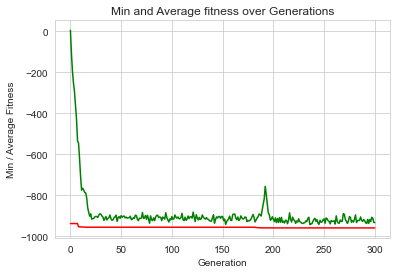

In [6]:
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

plt.show()